In [1]:
# https://towardsdatascience.com/ridgeline-plots-the-perfect-way-to-visualize-data-distributions-with-python-de99a5493052

In [2]:
# Install a pip package in the current Jupyter kernel
import sys
!{sys.executable} -m pip install joypy

You should consider upgrading via the 'pip install --upgrade pip' command.


In [3]:
import json

cis_filter = False

if cis_filter:
  f = open('rankings_cis.json', 'r')
else:
  f = open('rankings.json', 'r')

original_data = json.load(f)
f.close()

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import joypy

In [5]:
print(original_data)

[{'strat': 'Switch to renewable energy', 'mu': 28.867597588658416, 'sigma': 0.8277577265726453}, {'strat': 'Reducing emissions', 'mu': 28.052138345916198, 'sigma': 0.8182942349216101}, {'strat': 'Reshape our cities to be less car-dependent', 'mu': 26.43434065022332, 'sigma': 0.803890064203634}, {'strat': 'Smart infrastructure', 'mu': 26.307757870973564, 'sigma': 0.8152251813241435}, {'strat': 'Implement a carbon tax', 'mu': 26.00172269174559, 'sigma': 0.8011169536201186}, {'strat': 'Cut on consumption', 'mu': 25.73989449107825, 'sigma': 0.8058545942339691}, {'strat': 'Electric vehicles', 'mu': 25.394467792631193, 'sigma': 0.8056274283455263}, {'strat': 'Decentralized energy production and distribution systems', 'mu': 24.663532017319213, 'sigma': 0.8054638037999851}, {'strat': 'Educational tools about the effects and causes of climate change', 'mu': 24.5376626853039, 'sigma': 0.7974895855202495}, {'strat': 'Design computers/electronics for disassembly/deconstruction', 'mu': 24.373565213

In [6]:
import scipy.stats as stats

def norm(mu, sigma, n = 1000):
  a = mu - 3*sigma
  b = mu + 3*sigma
  dist = stats.truncnorm((a - mu) / sigma, (b - mu) / sigma, loc=mu, scale=sigma)
  return dist.rvs(n)

In [7]:
# created the basic data structure that will be plotted



data = []
for i in range(len(original_data)):
  d = original_data[i]
  n = 100000
  values = norm(d['mu'], d['sigma'], n)  
  strat = str(i+1).zfill(2) + '. ' + d['strat']
  for j in range(n):
    data.append([strat, values[j]])
  
df = pd.DataFrame(data, columns=['Strategy', 'Value'])
print(df)

                                    Strategy      Value
0             01. Switch to renewable energy  29.674082
1             01. Switch to renewable energy  28.588105
2             01. Switch to renewable energy  28.505946
3             01. Switch to renewable energy  28.347703
4             01. Switch to renewable energy  28.630741
5             01. Switch to renewable energy  28.742016
6             01. Switch to renewable energy  30.349042
7             01. Switch to renewable energy  27.951581
8             01. Switch to renewable energy  29.266084
9             01. Switch to renewable energy  29.556566
10            01. Switch to renewable energy  29.076285
11            01. Switch to renewable energy  30.053759
12            01. Switch to renewable energy  29.212510
13            01. Switch to renewable energy  29.041908
14            01. Switch to renewable energy  29.091373
15            01. Switch to renewable energy  27.784030
16            01. Switch to renewable energy  29

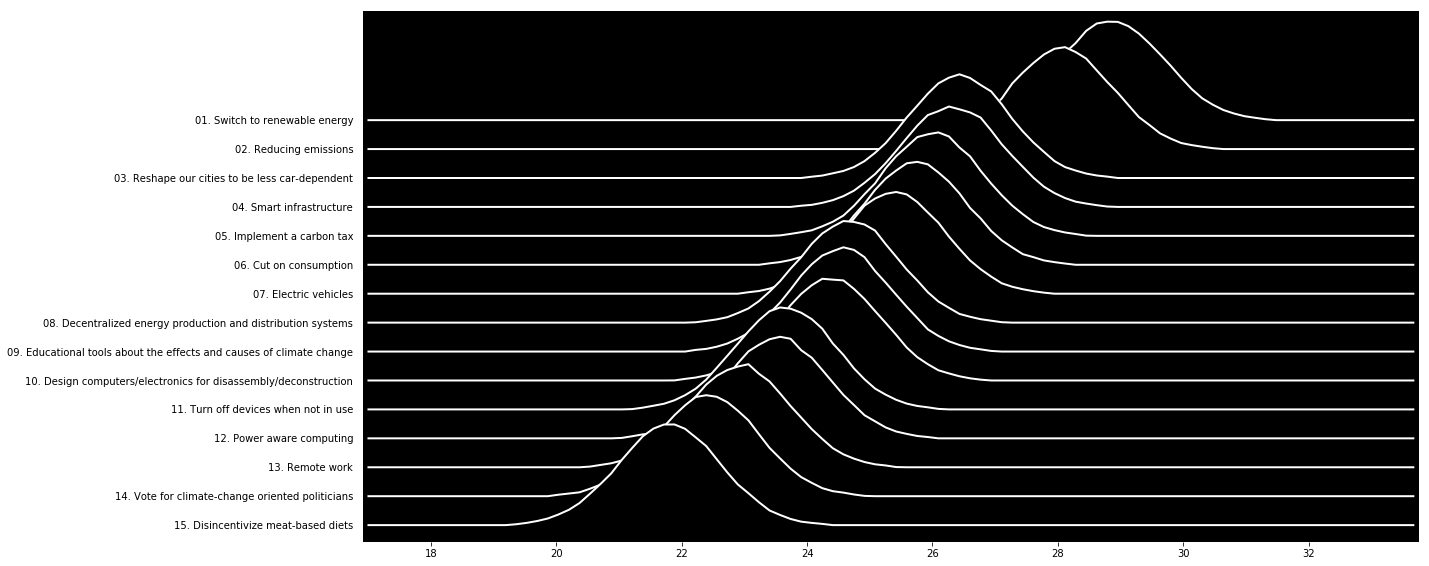

In [8]:
%matplotlib inline

fig, axes = joypy.joyplot(df, by="Strategy", 
                          grid=False, fill=True, color='k', background='k', linecolor="w", linewidth=2,
                          legend=False, overlap=2, figsize=(20,8), kind="counts", bins=100)


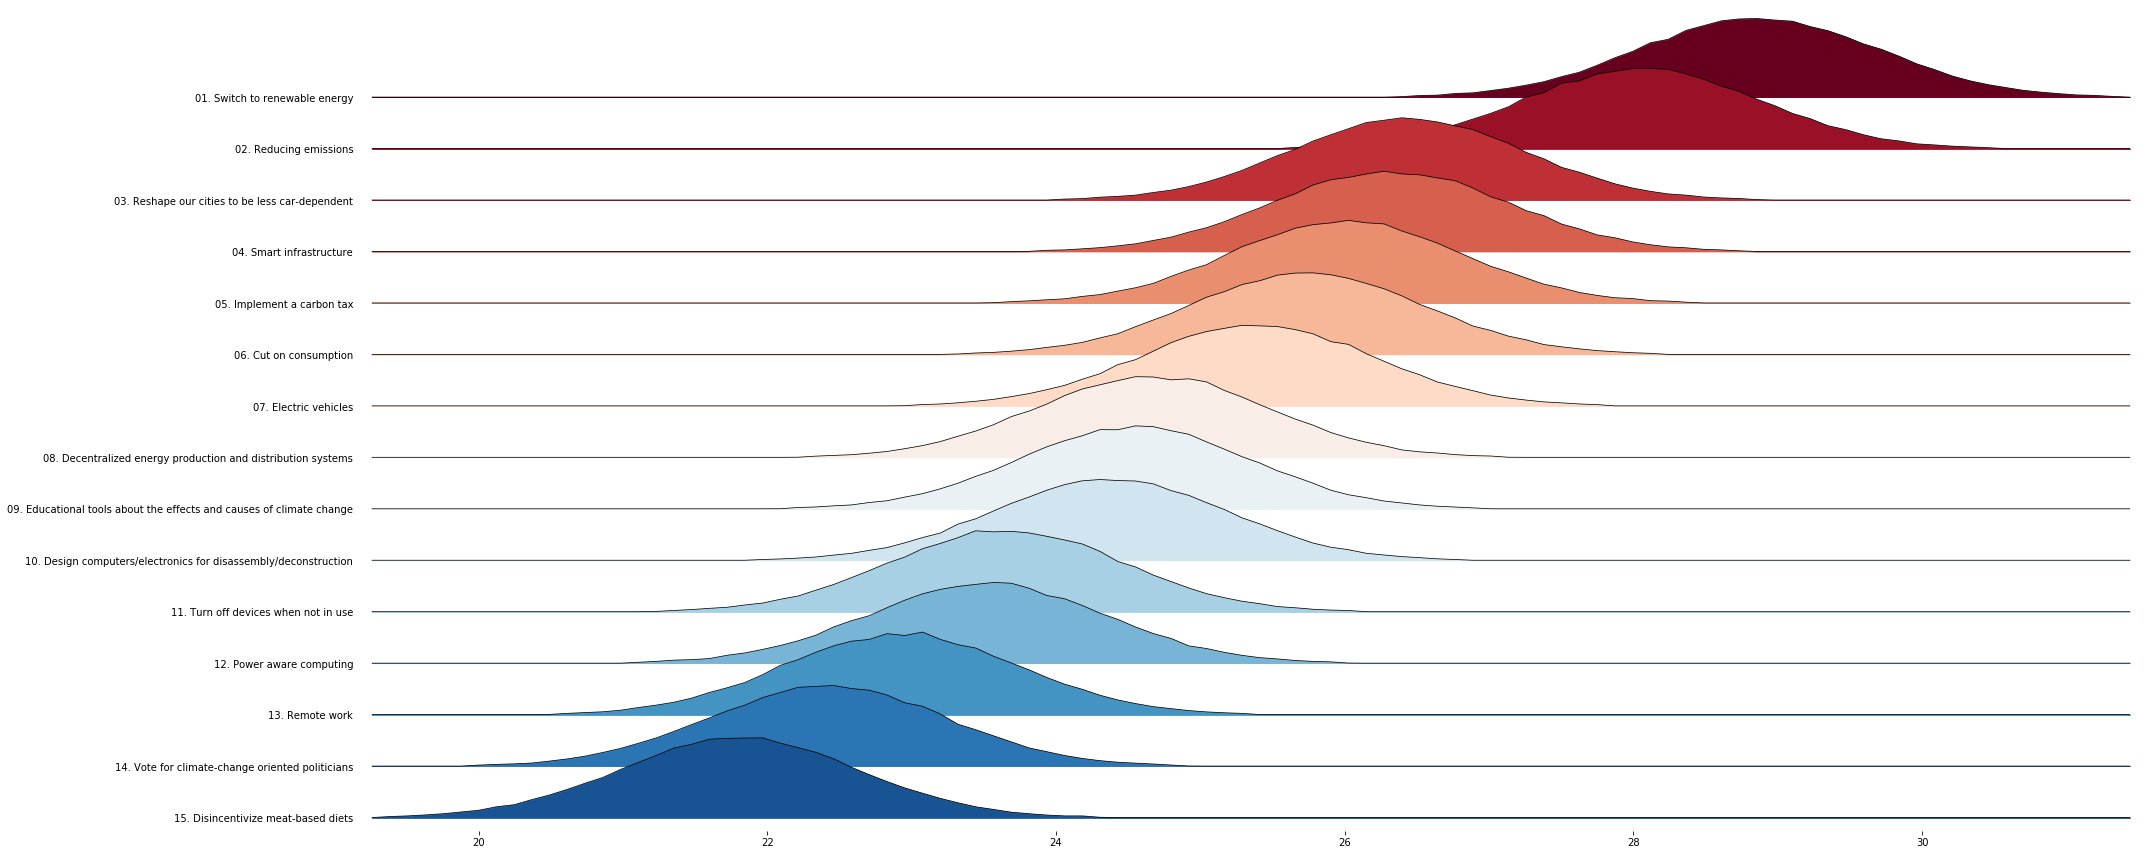

In [9]:
%matplotlib inline

from matplotlib import cm

fig, axes = joypy.joyplot(df, by="Strategy", 
                          grid=False, colormap=cm.RdBu, linewidth=0.75, x_range=[19.2,31.5],
                          legend=False, overlap=1, figsize=(30,12), kind="counts", bins=100)

fig.savefig("rank_general.svg")


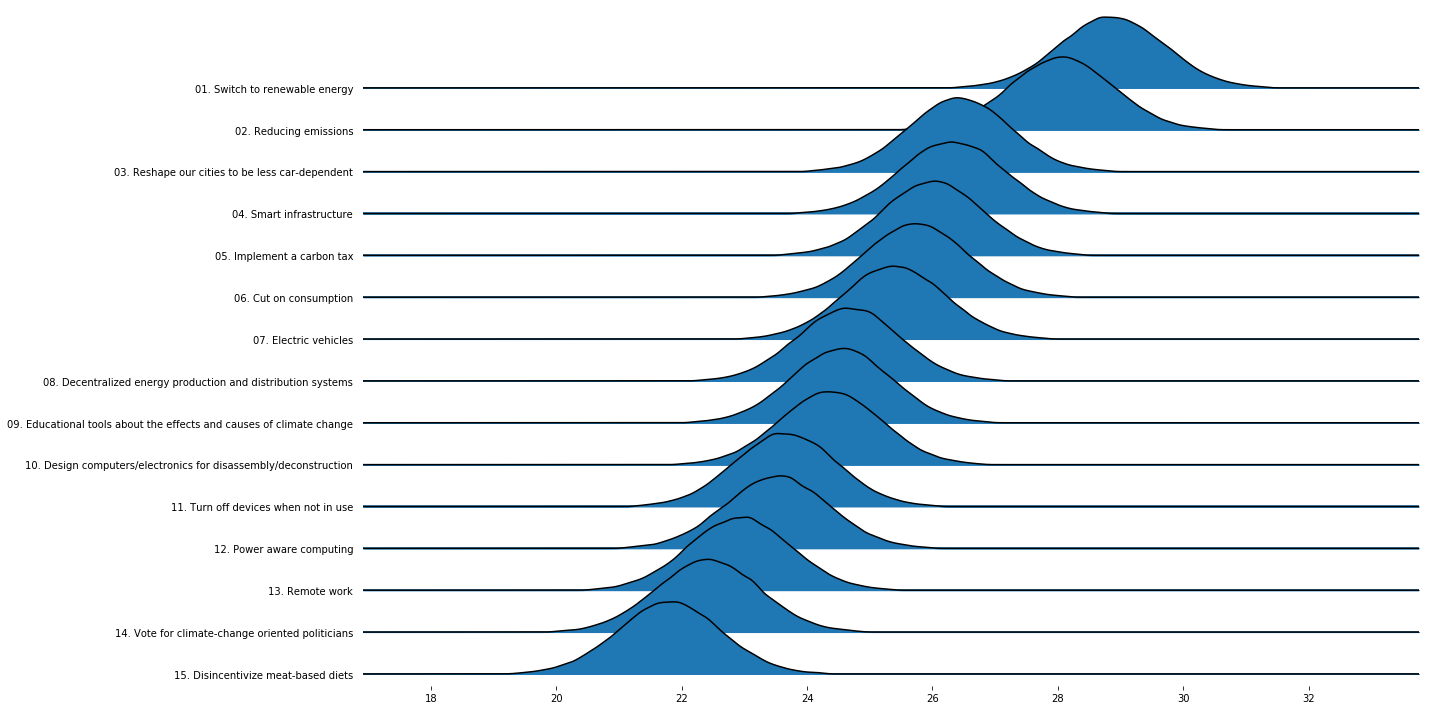

In [10]:
%matplotlib inline

fig, axes = joypy.joyplot(df, by="Strategy",figsize=(20,10))